In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

housing = fetch_california_housing()
X, y = housing.data, housing.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:

class SimpleNN(nn.Module):
    def __init__(self, input_size=8, hidden_sizes=[64]):
        super(SimpleNN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.relu = nn.ReLU()

        self.hidden_layers.append(nn.Linear(input_size, hidden_sizes[0]))
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]))

        self.out = nn.Linear(hidden_sizes[-1], 1)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.relu(layer(x))
        return self.out(x)

In [5]:

def run_experiment(hidden_sizes, loss_fn_name, optimizer_name, lr=0.01, epochs=100, batch_size=64):
    print(f"\n--- Ejecutando experimento: Hidden={hidden_sizes}, Loss={loss_fn_name}, Optimizer={optimizer_name} ---")
    

    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = SimpleNN(input_size=8, hidden_sizes=hidden_sizes).to(device)


    if loss_fn_name == "MSELoss":
        criterion = nn.MSELoss()
    elif loss_fn_name == "SmoothL1Loss":
        criterion = nn.SmoothL1Loss()
    else:
        raise ValueError("Función de pérdida no soportada")


    if optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=lr)
    elif optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=lr)
    else:
        raise ValueError("Optimizador no soportado")


    model.train()
    losses = []
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        losses.append(avg_loss)
        print(f"Época {epoch+1}/{epochs}, Pérdida: {avg_loss:.4f}")


    model.eval()
    with torch.no_grad():
        X_test_ = X_test.to(device)
        y_test_ = y_test.to(device)
        predictions = model(X_test_)

    mse = nn.MSELoss()(predictions, y_test_)
    rmse = torch.sqrt(mse).item()
    r2 = r2_score(y_test.cpu().numpy(), predictions.cpu().numpy())

    # Gráfica de pérdida
    plt.figure(figsize=(6, 4))
    plt.plot(losses)
    plt.xlabel("Épocas")
    plt.ylabel("Pérdida")
    plt.title(f"{optimizer_name} + {loss_fn_name} + {hidden_sizes}\nRMSE: {rmse:.4f} | R²: {r2:.4f}")
    plt.grid(True)
    plt.show()

    # Gráfica predicción vs realidad
    plt.figure(figsize=(6, 6))
    y_true = y_test.cpu().numpy()
    y_pred = predictions.cpu().numpy()
    plt.scatter(y_true, y_pred, alpha=0.4)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Valor real")
    plt.ylabel("Predicción")
    plt.title(f"Predicción vs Realidad\n{optimizer_name} + {loss_fn_name} + {hidden_sizes}")
    plt.grid(True)
    plt.show()

    return rmse, r2


Ejecutando experimento: [16, 8] | MSELoss | SGD

--- Ejecutando experimento: Hidden=[16, 8], Loss=MSELoss, Optimizer=SGD ---
Época 1/100, Pérdida: 0.9646
Época 2/100, Pérdida: 0.5902
Época 3/100, Pérdida: 0.5252
Época 4/100, Pérdida: 0.4829
Época 5/100, Pérdida: 0.4588
Época 6/100, Pérdida: 0.4422
Época 7/100, Pérdida: 0.4284
Época 8/100, Pérdida: 0.4169
Época 9/100, Pérdida: 0.4073
Época 10/100, Pérdida: 0.3997
Época 11/100, Pérdida: 0.3957
Época 12/100, Pérdida: 0.3867
Época 13/100, Pérdida: 0.3831
Época 14/100, Pérdida: 0.3770
Época 15/100, Pérdida: 0.3729
Época 16/100, Pérdida: 0.3681
Época 17/100, Pérdida: 0.3647
Época 18/100, Pérdida: 0.3623
Época 19/100, Pérdida: 0.3611
Época 20/100, Pérdida: 0.3586
Época 21/100, Pérdida: 0.3662
Época 22/100, Pérdida: 0.3589
Época 23/100, Pérdida: 0.3556
Época 24/100, Pérdida: 0.3529
Época 25/100, Pérdida: 0.3518
Época 26/100, Pérdida: 0.3507
Época 27/100, Pérdida: 0.3487
Época 28/100, Pérdida: 0.3474
Época 29/100, Pérdida: 0.3444
Época 30/100,

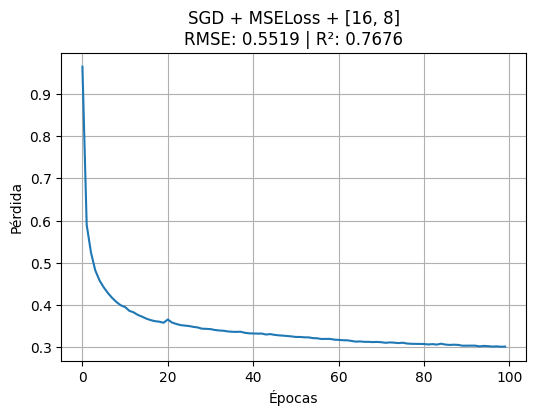

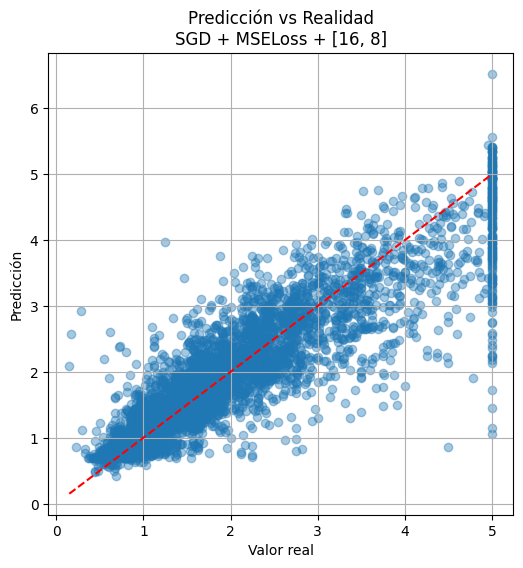


Ejecutando experimento: [16, 8] | MSELoss | Adam

--- Ejecutando experimento: Hidden=[16, 8], Loss=MSELoss, Optimizer=Adam ---
Época 1/100, Pérdida: 0.7474
Época 2/100, Pérdida: 0.4133
Época 3/100, Pérdida: 0.3934
Época 4/100, Pérdida: 0.3871
Época 5/100, Pérdida: 0.3696
Época 6/100, Pérdida: 0.3619
Época 7/100, Pérdida: 0.3657
Época 8/100, Pérdida: 0.3428
Época 9/100, Pérdida: 0.3270
Época 10/100, Pérdida: 0.3289
Época 11/100, Pérdida: 0.3203
Época 12/100, Pérdida: 0.3153
Época 13/100, Pérdida: 0.3111
Época 14/100, Pérdida: 0.3135
Época 15/100, Pérdida: 0.3093
Época 16/100, Pérdida: 0.3054
Época 17/100, Pérdida: 0.3044
Época 18/100, Pérdida: 0.3067
Época 19/100, Pérdida: 0.3057
Época 20/100, Pérdida: 0.3025
Época 21/100, Pérdida: 0.3043
Época 22/100, Pérdida: 0.3000
Época 23/100, Pérdida: 0.2968
Época 24/100, Pérdida: 0.2972
Época 25/100, Pérdida: 0.2943
Época 26/100, Pérdida: 0.2952
Época 27/100, Pérdida: 0.2936
Época 28/100, Pérdida: 0.2903
Época 29/100, Pérdida: 0.2910
Época 30/10

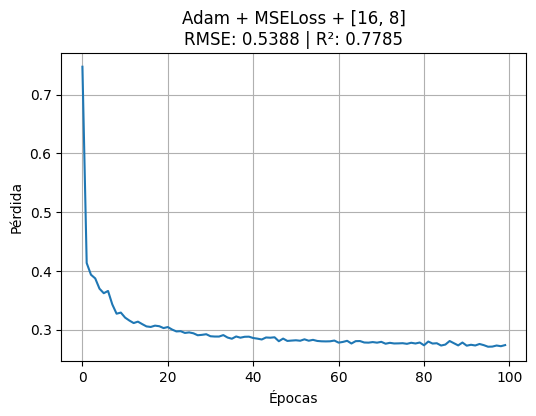

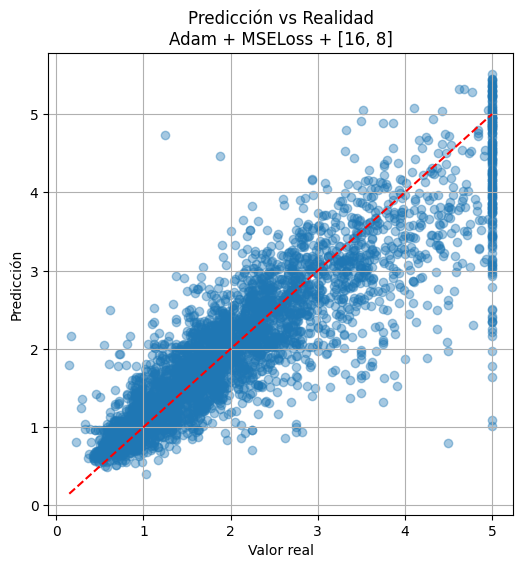


Ejecutando experimento: [16, 8] | SmoothL1Loss | SGD

--- Ejecutando experimento: Hidden=[16, 8], Loss=SmoothL1Loss, Optimizer=SGD ---
Época 1/100, Pérdida: 0.5695
Época 2/100, Pérdida: 0.2778
Época 3/100, Pérdida: 0.2471
Época 4/100, Pérdida: 0.2328
Época 5/100, Pérdida: 0.2229
Época 6/100, Pérdida: 0.2159
Época 7/100, Pérdida: 0.2104
Época 8/100, Pérdida: 0.2061
Época 9/100, Pérdida: 0.2025
Época 10/100, Pérdida: 0.1994
Época 11/100, Pérdida: 0.1968
Época 12/100, Pérdida: 0.1944
Época 13/100, Pérdida: 0.1924
Época 14/100, Pérdida: 0.1904
Época 15/100, Pérdida: 0.1886
Época 16/100, Pérdida: 0.1870
Época 17/100, Pérdida: 0.1856
Época 18/100, Pérdida: 0.1844
Época 19/100, Pérdida: 0.1831
Época 20/100, Pérdida: 0.1819
Época 21/100, Pérdida: 0.1807
Época 22/100, Pérdida: 0.1796
Época 23/100, Pérdida: 0.1784
Época 24/100, Pérdida: 0.1773
Época 25/100, Pérdida: 0.1762
Época 26/100, Pérdida: 0.1751
Época 27/100, Pérdida: 0.1740
Época 28/100, Pérdida: 0.1730
Época 29/100, Pérdida: 0.1720
Épo

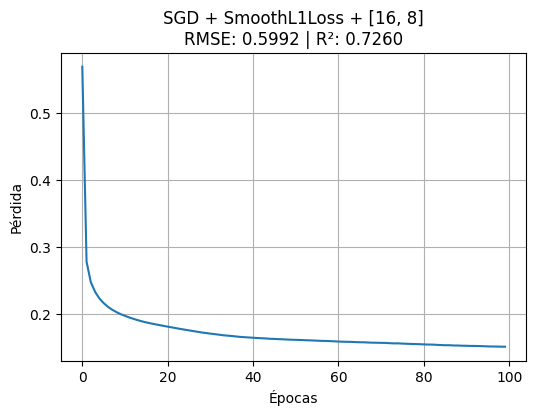

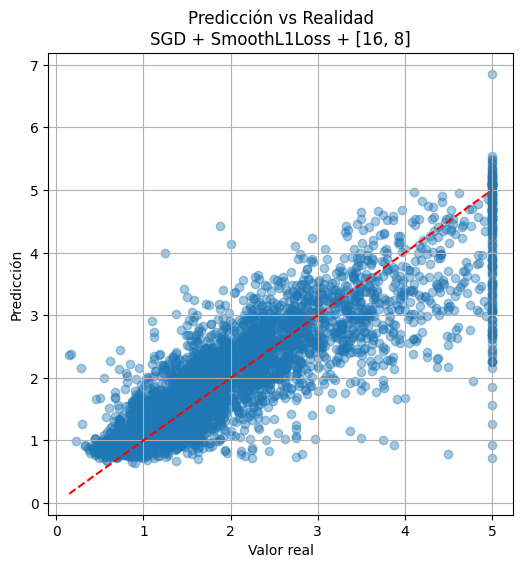


Ejecutando experimento: [16, 8] | SmoothL1Loss | Adam

--- Ejecutando experimento: Hidden=[16, 8], Loss=SmoothL1Loss, Optimizer=Adam ---
Época 1/100, Pérdida: 0.2735
Época 2/100, Pérdida: 0.1741
Época 3/100, Pérdida: 0.1653
Época 4/100, Pérdida: 0.1575
Época 5/100, Pérdida: 0.1522
Época 6/100, Pérdida: 0.1512
Época 7/100, Pérdida: 0.1474
Época 8/100, Pérdida: 0.1462
Época 9/100, Pérdida: 0.1448
Época 10/100, Pérdida: 0.1444
Época 11/100, Pérdida: 0.1436
Época 12/100, Pérdida: 0.1407
Época 13/100, Pérdida: 0.1401
Época 14/100, Pérdida: 0.1404
Época 15/100, Pérdida: 0.1371
Época 16/100, Pérdida: 0.1358
Época 17/100, Pérdida: 0.1380
Época 18/100, Pérdida: 0.1367
Época 19/100, Pérdida: 0.1340
Época 20/100, Pérdida: 0.1323
Época 21/100, Pérdida: 0.1326
Época 22/100, Pérdida: 0.1313
Época 23/100, Pérdida: 0.1310
Época 24/100, Pérdida: 0.1346
Época 25/100, Pérdida: 0.1307
Época 26/100, Pérdida: 0.1313
Época 27/100, Pérdida: 0.1330
Época 28/100, Pérdida: 0.1301
Época 29/100, Pérdida: 0.1296
É

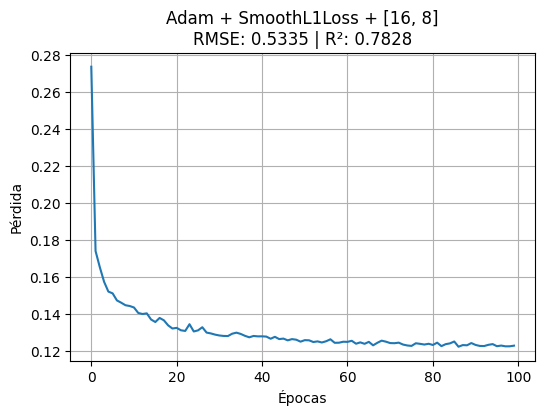

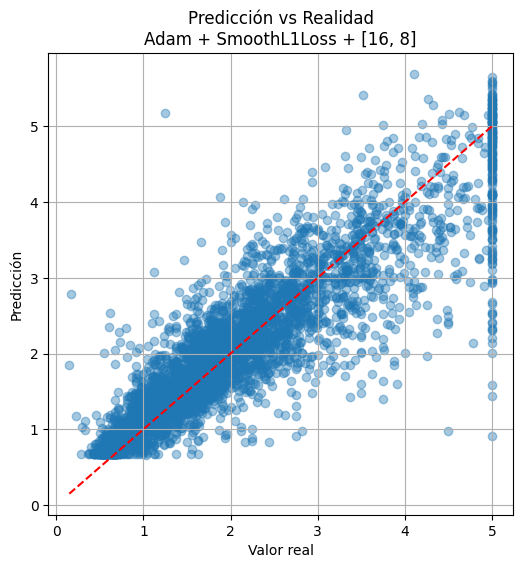


Ejecutando experimento: [64] | MSELoss | SGD

--- Ejecutando experimento: Hidden=[64], Loss=MSELoss, Optimizer=SGD ---
Época 1/100, Pérdida: 0.8676
Época 2/100, Pérdida: 0.5483
Época 3/100, Pérdida: 0.5045
Época 4/100, Pérdida: 0.5011
Época 5/100, Pérdida: 0.4589
Época 6/100, Pérdida: 0.4579
Época 7/100, Pérdida: 0.4400
Época 8/100, Pérdida: 0.4309
Época 9/100, Pérdida: 0.4267
Época 10/100, Pérdida: 0.4183
Época 11/100, Pérdida: 0.4763
Época 12/100, Pérdida: 0.4104
Época 13/100, Pérdida: 0.4049
Época 14/100, Pérdida: 0.4006
Época 15/100, Pérdida: 0.3963
Época 16/100, Pérdida: 0.3930
Época 17/100, Pérdida: 0.3897
Época 18/100, Pérdida: 0.3871
Época 19/100, Pérdida: 0.3844
Época 20/100, Pérdida: 0.3827
Época 21/100, Pérdida: 0.3783
Época 22/100, Pérdida: 0.3784
Época 23/100, Pérdida: 0.3762
Época 24/100, Pérdida: 0.3724
Época 25/100, Pérdida: 0.3714
Época 26/100, Pérdida: 0.3692
Época 27/100, Pérdida: 0.3694
Época 28/100, Pérdida: 0.3642
Época 29/100, Pérdida: 0.3645
Época 30/100, Pérdi

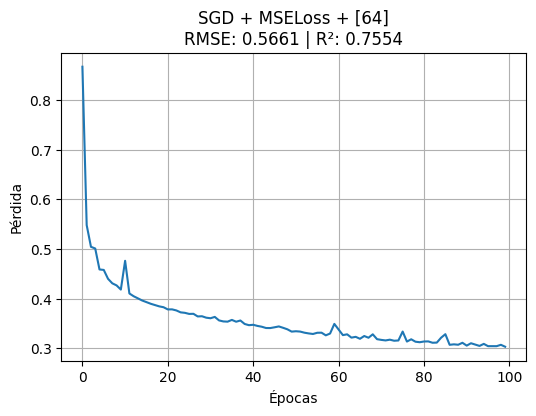

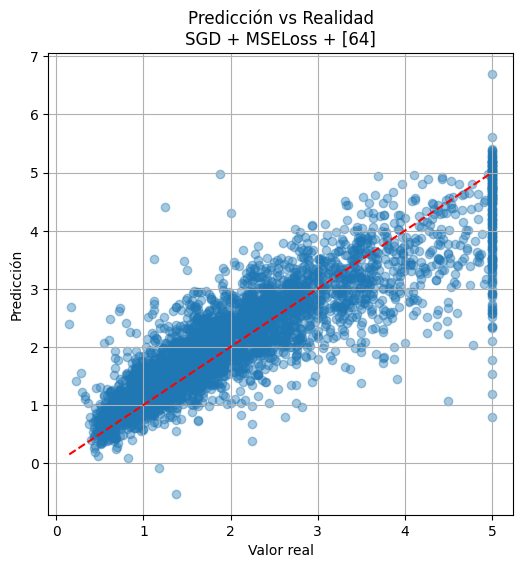


Ejecutando experimento: [64] | MSELoss | Adam

--- Ejecutando experimento: Hidden=[64], Loss=MSELoss, Optimizer=Adam ---
Época 1/100, Pérdida: 0.6535
Época 2/100, Pérdida: 0.4496
Época 3/100, Pérdida: 0.3972
Época 4/100, Pérdida: 0.3649
Época 5/100, Pérdida: 0.3505
Época 6/100, Pérdida: 0.3341
Época 7/100, Pérdida: 0.3527
Época 8/100, Pérdida: 0.3307
Época 9/100, Pérdida: 0.3195
Época 10/100, Pérdida: 0.3313
Época 11/100, Pérdida: 0.3196
Época 12/100, Pérdida: 0.3243
Época 13/100, Pérdida: 0.3152
Época 14/100, Pérdida: 0.3072
Época 15/100, Pérdida: 0.3096
Época 16/100, Pérdida: 0.3120
Época 17/100, Pérdida: 0.3082
Época 18/100, Pérdida: 0.3053
Época 19/100, Pérdida: 0.2998
Época 20/100, Pérdida: 0.3006
Época 21/100, Pérdida: 0.3063
Época 22/100, Pérdida: 0.3017
Época 23/100, Pérdida: 0.2997
Época 24/100, Pérdida: 0.2949
Época 25/100, Pérdida: 0.2943
Época 26/100, Pérdida: 0.2915
Época 27/100, Pérdida: 0.2891
Época 28/100, Pérdida: 0.2904
Época 29/100, Pérdida: 0.2914
Época 30/100, Pér

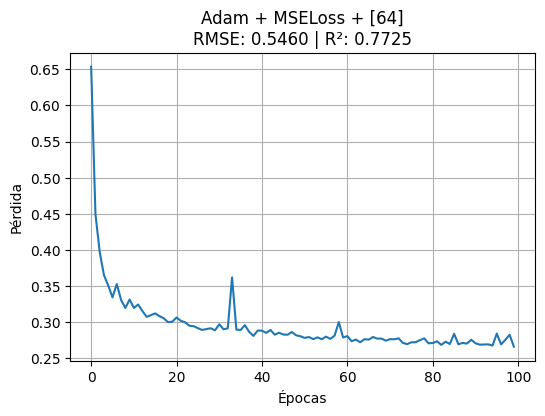

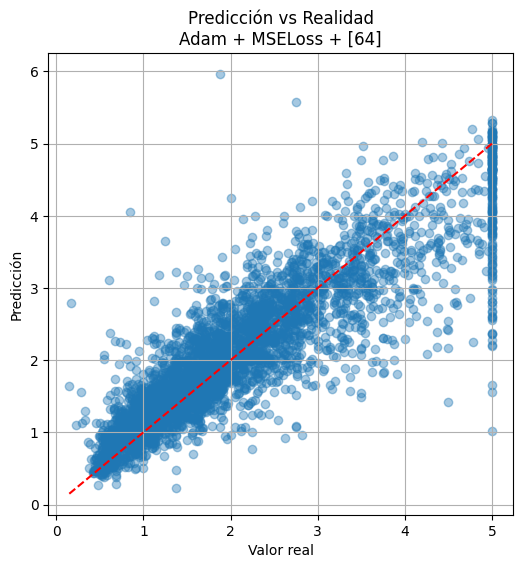


Ejecutando experimento: [64] | SmoothL1Loss | SGD

--- Ejecutando experimento: Hidden=[64], Loss=SmoothL1Loss, Optimizer=SGD ---
Época 1/100, Pérdida: 0.5105
Época 2/100, Pérdida: 0.2824
Época 3/100, Pérdida: 0.2475
Época 4/100, Pérdida: 0.2301
Época 5/100, Pérdida: 0.2197
Época 6/100, Pérdida: 0.2125
Época 7/100, Pérdida: 0.2073
Época 8/100, Pérdida: 0.2030
Época 9/100, Pérdida: 0.1997
Época 10/100, Pérdida: 0.1969
Época 11/100, Pérdida: 0.1944
Época 12/100, Pérdida: 0.1924
Época 13/100, Pérdida: 0.1904
Época 14/100, Pérdida: 0.1887
Época 15/100, Pérdida: 0.1870
Época 16/100, Pérdida: 0.1857
Época 17/100, Pérdida: 0.1842
Época 18/100, Pérdida: 0.1828
Época 19/100, Pérdida: 0.1815
Época 20/100, Pérdida: 0.1805
Época 21/100, Pérdida: 0.1792
Época 22/100, Pérdida: 0.1780
Época 23/100, Pérdida: 0.1772
Época 24/100, Pérdida: 0.1762
Época 25/100, Pérdida: 0.1753
Época 26/100, Pérdida: 0.1744
Época 27/100, Pérdida: 0.1736
Época 28/100, Pérdida: 0.1728
Época 29/100, Pérdida: 0.1719
Época 30/

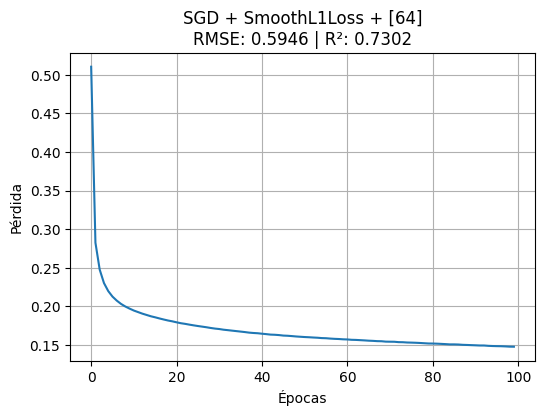

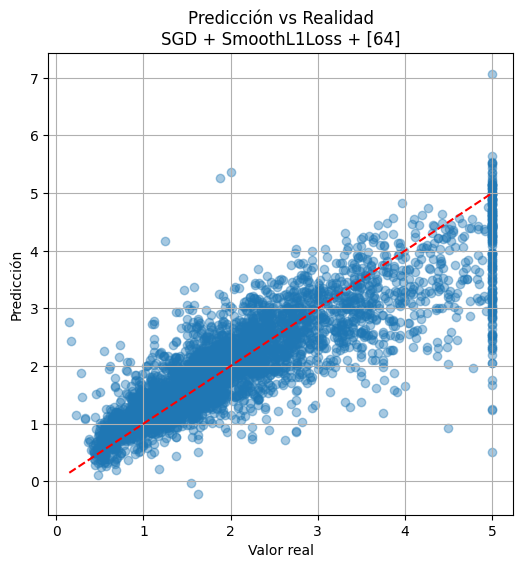


Ejecutando experimento: [64] | SmoothL1Loss | Adam

--- Ejecutando experimento: Hidden=[64], Loss=SmoothL1Loss, Optimizer=Adam ---
Época 1/100, Pérdida: 0.2297
Época 2/100, Pérdida: 0.1637
Época 3/100, Pérdida: 0.1554
Época 4/100, Pérdida: 0.1523
Época 5/100, Pérdida: 0.1492
Época 6/100, Pérdida: 0.1459
Época 7/100, Pérdida: 0.1456
Época 8/100, Pérdida: 0.1423
Época 9/100, Pérdida: 0.1408
Época 10/100, Pérdida: 0.1399
Época 11/100, Pérdida: 0.1389
Época 12/100, Pérdida: 0.1398
Época 13/100, Pérdida: 0.1387
Época 14/100, Pérdida: 0.1376
Época 15/100, Pérdida: 0.1359
Época 16/100, Pérdida: 0.1366
Época 17/100, Pérdida: 0.1364
Época 18/100, Pérdida: 0.1345
Época 19/100, Pérdida: 0.1352
Época 20/100, Pérdida: 0.1345
Época 21/100, Pérdida: 0.1319
Época 22/100, Pérdida: 0.1336
Época 23/100, Pérdida: 0.1325
Época 24/100, Pérdida: 0.1306
Época 25/100, Pérdida: 0.1308
Época 26/100, Pérdida: 0.1300
Época 27/100, Pérdida: 0.1290
Época 28/100, Pérdida: 0.1311
Época 29/100, Pérdida: 0.1293
Época 3

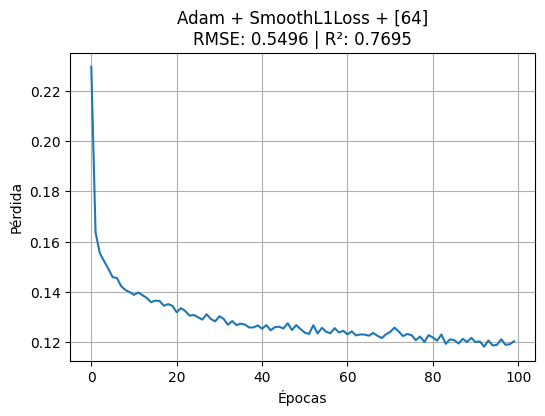

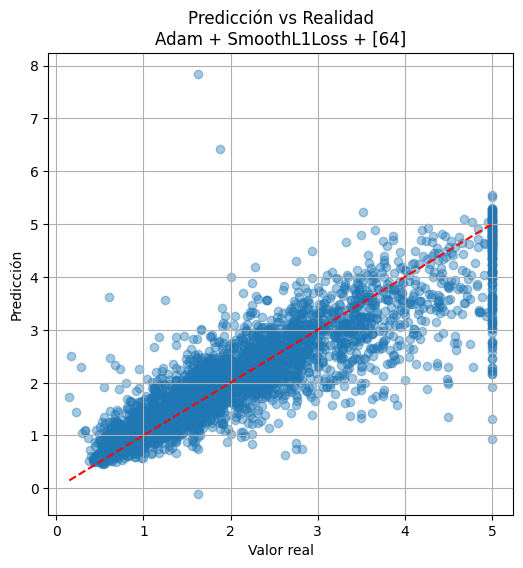

In [6]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
experimentos = [
    ([16, 8], 'MSELoss', 'SGD'),
    ([16, 8], 'MSELoss', 'Adam'),
    ([16, 8], 'SmoothL1Loss', 'SGD'),
    ([16, 8], 'SmoothL1Loss', 'Adam'),
    ([64], 'MSELoss', 'SGD'),
    ([64], 'MSELoss', 'Adam'),
    ([64], 'SmoothL1Loss', 'SGD'),
    ([64], 'SmoothL1Loss', 'Adam')
]

for hidden, loss_fn, optim_name in experimentos:
    print(f"\nEjecutando experimento: {hidden} | {loss_fn} | {optim_name}")
    run_experiment(hidden_sizes=hidden, loss_fn_name=loss_fn, optimizer_name=optim_name,
                       lr=0.01, batch_size=64, epochs=100)
